# Reading - 3 Basic plotting
In this lesson we will learn to use the `plot()` method of a **pandas.DataFrame** to create simple exploratory graphs from tabular data.

Learning objectives:
By the end of this lesson students will be able to:

- Obtain and interpret preliminary information about a pandas.DataFrame using methods such as `info() (structure)`, `describe() (summary statistics)`, `nunique() (unique value counts)`, `unique() (distinct values)`, and `value_counts() (frequency counts)`
- Create simple exploratory plots using the plot() method for pandas.DataFrames to visualize trends and distributions
- Understand the concept of performing operations on a pandas.DataFrame in-place
- Apply method chaining to enable concise and readable code

## About the data

In this lesson we will reuse the annual estimates of bird species abundance in four coastal wetlands along the California coast that we used in the previous lesson on subsetting a pandas.DataFrame. This dataset was derived for education purposes for this course from the UCSB SONGS Mitigation Monitoring: Wetland Performance Standard - Bird Abundance and Species Richness dataset [1]. The SONGS dataset was collected as part of the San Onofre Nuclear Generating Station (SONGS) San Dieguito Wetland Restoration monitoring program.

The annual bird species abundance estimates is a CSV file with 13 columns and 14 rows. You can see the first three rows below.

The four wetlands where the bird surveys occured are Carpinteria Salt Marsh (CSM), Mugu Lagoon (MUL), the San Dieguito Wetland (SDW), and the Tijuana Estuary (TJE). The values from the second column to the last column correspond to the number of different bird species recorded across the survey sites in each wetland during winter, spring, and fall of a given year. For example, the CSM_fall column has the number of species recorded in fall at Carpinteria Salt Marsh across years. The year column corresponds to the calendar year on which the data was collected. Surveys have happened yearly from 2010 to 2023.

# plot() method
Let us start by loading the data:


In [1]:
import pandas as pd

# Read in file
df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# Check the first 5 rows
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


A **pandas.DataFrame** has a `built-in method plot()` for plotting. When we call it without specifying any other parameters plot() creates one line plot for each of the columns with numeric data.



<Axes: >

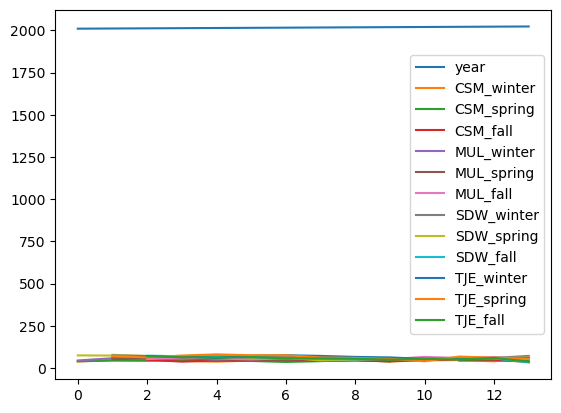

In [2]:
# Default plot(): one line plot per column with numeric data
df.plot()

As we can see, this doesn’t make much sense! In particular, look at the x-axis. The default for `plot` is to use the values of the index as the x-axis values. Let’s see some examples about how to improve this situation.

# Line plots
We can make a line plot of one column against another by using the following the general syntax:


`df.plot(x='x_values_column', y='y_values_column')`

**Example**
If we want to plot the bird surveys at Carpinteria Salt Marsh across years we can do:

<Axes: xlabel='year'>

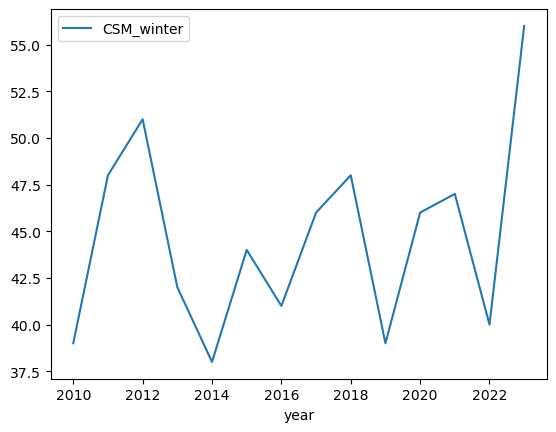

In [3]:
# Birds species registered during winter at CSM yearly
df.plot(x='year', y='CSM_winter')

We can do some basic customization specifying other parameters of the `plot()` method. Some basic ones are:

- `title`: title to use for the plot.
- `xlabel`: name to use for the x-label on x-axis
- `ylabel`: bame to use for the y-label on y-axis
- `color`: change the color of our plot
- `legend`: boolean value `True` or `False`. True (default) includes the legend, `False` removes the legend

In action:



<Axes: title={'center': 'Bird species registered during winter at Carpinteria Salt Marsh'}, xlabel='Year', ylabel='Number of bird species'>

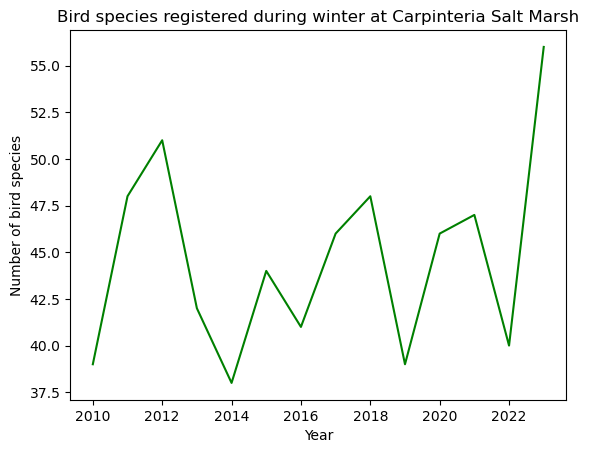

In [4]:
df.plot(x='year', 
        y='CSM_winter',
        title='Bird species registered during winter at Carpinteria Salt Marsh',
        xlabel='Year',
        ylabel='Number of bird species',
        color='green',
        legend=False
        )

# Can you hide the message ??

You can see all the `optional parameters for the plot() function in the documentation.`

# Check-in !
1. Plot a graph of the spring bird surveys at Mugu Lagoon with respect to the years. Include some basic customization.



2. Use the isna() method for pandas.Series and row selection to select the rows in which Mugu Lagoon has NAs during the spring survey.




In [5]:
# checking columns to see name of variable
df.columns
df.head(2)

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN


<Axes: title={'center': 'Bird species registered during spring at Mugu Lagoon'}, xlabel='Year', ylabel='Number of bird species'>

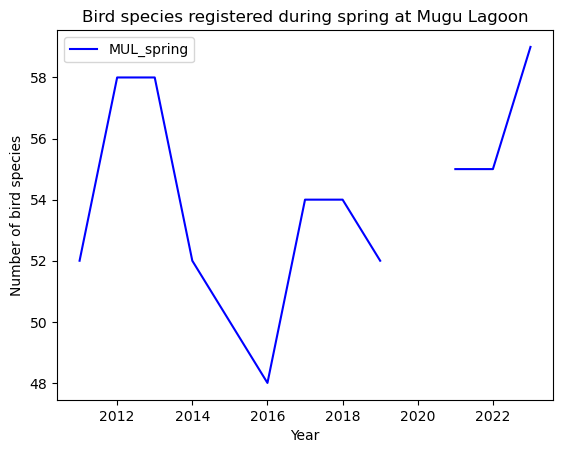

In [6]:
df.plot(x='year', 
        y='MUL_spring',
        title='Bird species registered during spring at Mugu Lagoon',
        xlabel='Year',
        ylabel='Number of bird species',
        color='blue',
        legend=True
        )
#possibly some na values during the covid year/s (2019-2021)

In [7]:
#2.
df['MUL_spring'].isna()
# Can add .sum() to show how many NA's values are present
df['MUL_spring'].isna().sum()

print(df['MUL_spring'])

Only 13 rows of data. Row 0 and Row 10 have NaN values (missing vlaue/not defined)

SyntaxError: invalid syntax (2088108271.py, line 8)

# Multiple line plots
We can plot multiple line plots by updating these parameters in the `plot()` method:

- `y` : a list of column names that will be plotted against the x-axis
- `color`: a dictionary `{'column_1' : 'color_1', 'column_2':'color_2}` specifying the color of each column’s line plot

# Example
Let’s say we want to compare the bird surveys at the Tijuana Estuary during spring and fall across years.

In [ ]:
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1',
                 'TJE_fall': '#AB47BC'
                 }
        )

Notice that for specifying the colors we used a HEX code, this gives us more control over how our graph looks.

We can also create separate plots for each column by setting the subset to True.

In [ ]:
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1',
                 'TJE_fall': '#AB47BC'
                 },
        subplots=True
        )

# Updating the index
**Updating the index** of our data frame to be something other than the default integers numbering the rows can be a useful operation for plotting. To update the index we use the `set_index()` method for a `pandas.DataFrame`. It’s general syntax is:

`df = df.set_index(new_index)`


where `new_index` is:

the name of the column in the data frame df we want to use as new index
if our new index is not a column in the data frame, an array or pandas.Series of the same length as our data frame (we need one index per row).
This operation does not happen in-place.

- A funciton **acting in-place** means that our original object (in this case a pandas.DataFrame) is modified.
- If the function **does not act in-place**, a new object (in this case a pandas.DataFrame) is created and the original is not modified.
- If we wanted to update our df data frame we could do an **explicit assignment** to reassign the output of `set_index()` to df:

## Set `column_name` column in df as the new index (reassignment)

`df = df.set_index('column_name')`

**or use the optional inplace parameter:**

## Set `column_name` column in df as the new index (modify df in-place)

`df.set_index('column_name', inplace=True)`



In general, avoid using the `inplace=True` argument and favor explicit variable assignments
Check the information about the `inplace` parameter in the set_index() documentation. You will often see the inplace parameter in methods for pandas.DataFrames. The best practice is to avoid `inplace=True` for better readability and maintainable code. Explicitly assigning the result to a new variable or the same variable makes it clear that an operation has occurred.

# Example
In all our previous examples we used the year column as the x-axis. Since all our bird survey variables are dependent on the year, it makes sense to use the year column as the index of the data frame:



In [ ]:
# Update index to be the year column
df = df.set_index('year')
df.head()

In [ ]:
# Simple plot of Carpinteria Salt Marsh winter surveys
df.plot(y='CSM_winter')

If needed, we can reset the index to be the numbering of the rows:



In [ ]:
# To Reset_index()

df = df.reset_index()
df.head()

## Check-in !
1. Without running the code, give a step-by-step breakdown of what this code is doing:
`df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()`
** this is method chaining, similar to piping in R**

2. Is this code modifying the data frame df? Why or why not?

3. Run the code and examine the graph. Review the data description. Do we have all the necessary information to make sure it makes sense to directly compare the surveys at these different sites?

In [ ]:
# 1. Example of Method chaining
# Instead of have 0-13 as the index, otherwise known as object id to identify 
# rows. Similar to gis
# We are now setting the index to the 'year' column
df.set_index('year')
# .loc allows to select specific rows, columns, or combination of both, like in this case
# Here we are selecting only data from SDW_spring through TJE_fall.
# with .loc it will grab those two columns and everything in between.
.loc[:,'SDW_winter':'TJE_fall'].plot()

In [ ]:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()

#### 2. No, becuase we are using method chaining. Also not assiging it to a new variable.
#### 3. I feel like we have the data to compare each site, but it could be organized by each sites, instead of all together.

# Method chaining
The code used in the check-in

`df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()`

is an example of **method chaining**. Each method in the chain returns an object (typically the same object), allowing the next method to be called directly on the result. This is a powerful technique that makes code concise and readable.

Chaining methods can result in lines of code that are too long and hard to read. We can break up chains of methods by using parenthesis:

In [ ]:
(df.set_index('year')
  .loc[:,'SDW_winter':'TJE_fall']
  .plot()
)

**Method chaining and the R pipe operator**
If you are familiar with R, you may have noticed that the period . in the method chianing acts in the same way as the R pipe operator (%>% or |>). The syntax of one method per line is similar to what is used in the tidyverse, except that the pipe is used at the end of the line, while the period is used at the beginning of the line.

An **alternative to the previous code chaining** could have been:



In [ ]:
year_index_df = df.set_index('year')
subset_df = year_index_df.loc[:,'SDW_winter':'TJE_fall']
subset_df.plot()

While this accomplishes the same output, several variables are created along the way and it can be difficult to keep track of what is what.


**Use method chaining wisely**
Method chaining is particularly useful in pandas for streamlining multiple data manipulations. However:

- method chaining should be used with care to avoid overly complex and difficult-to-debug code, and
- if you’re not familiar with the methods, it’s better to apply them individually and review the results after each step.

We will move on to another dataset for the rest of this lesson.

# About the data
For the next plots we will use the Palmer Penguins dataset [2] developed by Drs. Allison Horst, Alison Hill and Kristen Gorman. This dataset contains size measurements for three penguin species in the Palmer Archipelago, Antarctica during 2007, 2008, and 2009.

The dataset has 344 rows and 8 columns. We can see it’s first three rows below:

# Data exploration
The data is usually accessed through the palmerpenguins R data package [2]. In this lesson we will access the CSV directly into our workspace using the URL: https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv

### Let’s start by reading in the data:



In [ ]:
# Read in data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

### And getting some preliminary information:



In [ ]:
# Check column data types and NA values
penguins.info()

In [ ]:
# Simple statistics about numeric columns
penguins.describe()

We can also subset the dataframe to get information about a particular column or groups of columns:



In [ ]:
# Count unique values in categorical columns and year
penguins[['species', 'island', 'sex', 'year']].nunique()

In [ ]:
# Get unique values in species column
penguins['species'].unique()

In [ ]:
# Number of values per unique value in species column
penguins['species'].value_counts()

# `kind` argument in `plot()`

At the beginning of the lesson we talked about how the plot() method creates a line plot by default. The parameter that controls this behaviour is the kind parameter. By changing the value of kind we can create different kinds of plots. Let’s look at the documentation to see what these values are:


Notice the default value of kind is 'line'.

Let’s change the kind parameter to create some different plots.

# Scatter plots

Suppose we want to visualy compare the flipper length against the body mass, we can do this with a scatterplot:



In [ ]:
penguins.plot(kind='scatter',
              x='flipper_length_mm', 
              y='body_mass_g')

In [ ]:
penguins.plot(kind='scatter',
              x='flipper_length_mm', 
              y='body_mass_g',
              title='Flipper length and body mass for Palmer penguins',
              xlabel='Flipper length (mm)',
              ylabel='Body mass (g)',
              color='#ff3b01',
              alpha=0.4  # Controls transparency
              )

# Bar plots
We can create bar plots of our data setting kind='bar' in the plot() method.

For example, let’s say we want to get data about the 10 penguins with lowest body mass. We can first select this data using the nsmallest() method for series:

In [ ]:
smallest = penguins['body_mass_g'].nsmallest(10)
smallest

In [ ]:
# We can then plot this data as a bar plot
smallest.plot(kind='bar')

#### If we wanted to look at other data for these smallest penguins we can use a different call to the `nsmallest` method:

In [ ]:
penguins.nsmallest(10, 'body_mass_g')

# Histograms
We can create a histogram of our data setting kind='hist' in plot().



In [ ]:
# Using plot without subsetting data - a mess again
penguins.plot(kind='hist')

To gain actual information, let’s subset the data before plotting it. For example, suppose we want to do a preliminary graph for the distribution of flipper length. We could do it in this way:



In [ ]:
# Distribution of flipper length measurements
# First select data, then plot
penguins['flipper_length_mm'].plot(kind='hist',
                                title='Penguin flipper lengths',
                                xlabel='Flipper length (mm)',
                                grid=True)

# Check-in !
1. Select the bill_length_mm and bill_depth_mm columns in the penguins dataframe and then update the kind parameter to box to make boxplots of the bill length and bill depth.

2. Create a simple histogram of the flipper length of female gentoo penguins.

In [ ]:
# Works for one column-
df = penguins.loc[:,['bill_length_mm']]
#checking if its a dataframe
type(df)
# Checking to see if i get only both columns
#df1 = 
penguins.loc[:,['bill_length_mm','bill_depth_mm']]
#print(type(df1))


In [ ]:
penguins.loc[:,['bill_length_mm','bill_depth_mm']].plot(kind = 'box')


In [ ]:
# Check spelling/ uppercase
penguins['species'].unique()

In [ ]:
#2. Filter for only gentoo and female only!
gentoo = penguins[(penguins['species'] == 'Gentoo') & (penguins['sex'] == 'female')]
gentoo.head()

In [ ]:
# Plot it
gentoo['flipper_length_mm'].plot(kind='hist',
                                title='Penguin flipper lengths',
                                xlabel='Flipper length (mm)',
                                grid=True)